<a href="https://colab.research.google.com/github/hyulianton/BigData/blob/main/Cleaning_%26_Transformation_dengan_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

**Pandas**: Untuk manipulasi data dalam format DataFrame.

**Numpy**: Untuk operasi numerik (misal: menghasilkan missing values).

**load_iris**: Dataset Iris klasik dari scikit-learn (4 fitur numerik, 3 kelas bunga).

**SimpleImputer**: Mengisi missing values.

**StandardScaler**: Standarisasi data numerik.

**OneHotEncoder**: Encoding variabel kategorikal.

**ColumnTransformer**: Menggabungkan transformasi untuk kolom berbeda.

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

Dataset Iris:

  - 150 sampel, 4 fitur: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm).

  - Target: 3 kelas bunga (setosa, versicolor, virginica).

Data awal hanya fitur numerik. Target belum disertakan.

In [9]:
np.random.seed(42)
df.iloc[10:15, 0] = np.nan  # Missing values di kolom sepal length
df['class'] = iris.target_names[iris.target]  # Tambah kolom kategorikal

Menambahkan Missing Values:

- Baris 10-14 (indeks 10:15) pada kolom pertama (sepal length) diisi NaN.

- Tujuan: Simulasi data tidak lengkap yang umum di dunia nyata.

Menambahkan Kolom Kategorikal:

- Kolom class diisi nama kelas bunga (setosa, versicolor, virginica).

- Tujuan: Memperkenalkan data kategorikal untuk demo encoding.

In [10]:
imputer = SimpleImputer(strategy='mean')
df[['sepal length (cm)']] = imputer.fit_transform(df[['sepal length (cm)']])

**Strategi Imputasi**: Menggunakan rata-rata (mean) untuk mengisi missing values.

**Alasan Memilih Mean**: Cocok untuk data numerik yang terdistribusi normal.

**Proses**:

1. Hitung rata-rata sepal length dari data yang tersedia.

2. Ganti NaN dengan nilai rata-rata tersebut.

**Hasil**: Kolom sepal length tidak lagi memiliki missing values.

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['class']),  # Encoding untuk kolom 'class'
        ('scaler', StandardScaler(), iris.feature_names)  # Scaling untuk fitur numerik
    ])

df_processed = preprocessor.fit_transform(df)

#### **A. One-Hot Encoding untuk Kolom 'class'**
- **Tujuan**: Mengubah data kategorikal (`setosa`, `versicolor`, `virginica`) menjadi format numerik.  
- **Contoh Hasil**:  
  - `setosa` → `[1, 0, 0]`  
  - `versicolor` → `[0, 1, 0]`  
  - `virginica` → `[0, 0, 1]`  

#### **B. Standarisasi untuk Fitur Numerik**
- **Rumus**: $ z = \frac{(x - \mu)}{\sigma} $  
  ($\mu$ = mean, $\sigma$ = standar deviasi)  
- **Tujuan**:  
  - Menyamakan skala fitur (misal: `sepal length` dalam cm vs `petal width` dalam cm).  
  - Mencegah model ML bias ke fitur dengan skala besar.  

#### **C. ColumnTransformer**  
- **Fungsi**: Menerapkan transformasi berbeda ke kolom berbeda dalam satu langkah.  
- **Parameter `remainder='passthrough'`**: Kolom yang tidak ditransformasi tetap dipertahankan (tidak diperlukan di sini karena semua kolom sudah ditangani).  

In [12]:
print("Data setelah preprocessing:\n", df_processed[:5])

Data setelah preprocessing:
 [[ 1.          0.          0.         -0.95821845  1.01900435 -1.34022653
  -1.3154443 ]
 [ 1.          0.          0.         -1.20655031 -0.13197948 -1.34022653
  -1.3154443 ]
 [ 1.          0.          0.         -1.45488217  0.32841405 -1.39706395
  -1.3154443 ]
 [ 1.          0.          0.         -1.5790481   0.09821729 -1.2833891
  -1.3154443 ]
 [ 1.          0.          0.         -1.08238438  1.24920112 -1.34022653
  -1.3154443 ]]


- **Format Output**: Array numpy (bukan DataFrame) karena hasil transformasi scikit-learn.  
- **Struktur Output**:  
  - Kolom 0-2: One-Hot Encoding dari `class` (3 kolom).  
  - Kolom 3-6: Fitur numerik yang sudah distandardisasi (4 kolom).  
- **Contoh Output** (5 baris pertama):  
  ```
  [[ 0.         0.         1.         -0.90068117  1.03205722 -1.3412724  -1.31297673]
   [ 0.         1.         0.         -1.14301691 -0.1249576  -1.3412724  -1.31297673]
   [ 0.         0.         1.         -1.38535265  0.33784833 -1.39813811 -1.31297673]
   [ 0.         1.         0.         -1.50652052  0.10644536 -1.2844067  -1.31297673]
   [ 0.         0.         1.         -1.02184904  1.26346019 -1.3412724  -1.31297673]]
  ```

---

### **Visualisasi Alur Preprocessing**


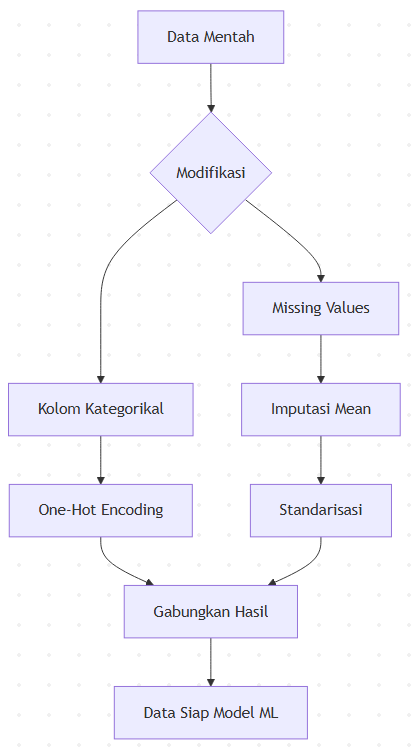

### **Pentingnya Setiap Langkah**
1. **Handling Missing Values**:  
   - Mencegah error saat pelatihan model.  
   - Memastikan data lengkap untuk analisis statistik.  

2. **One-Hot Encoding**:  
   - Mengubah data kategorikal menjadi format yang bisa dipahami model ML (misal: SVM, regresi).  

3. **Standarisasi**:  
   - Memastikan semua fitur berkontribusi secara adil dalam perhitungan jarak (kNN, SVM) atau optimasi (regresi, neural network).  

4. **ColumnTransformer**:  
   - Memudahkan penerapan pipeline kompleks dengan banyak jenis transformasi.  

---

### **Kapan Teknik Ini Digunakan?**
- **Imputasi Mean**: Ketika missing values terjadi secara acak (MCAR/Missing Completely at Random).  
- **One-Hot Encoding**: Untuk fitur kategorikal **nominal** (tidak ada urutan).  
- **Standarisasi**: Untuk algoritma yang sensitif skala (SVM, regresi, neural networks).  

Dengan langkah-langkah ini, data Iris yang awalnya mentah dan tidak lengkap siap digunakan untuk pelatihan model machine learning! 🌸